#

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
import requests

In [45]:
path = './trains.csv'
trains_df = pd.read_csv(path)

In [46]:
trains_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


In [47]:
# Check for missing values
missing_values = trains_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


<AxesSubplot:>

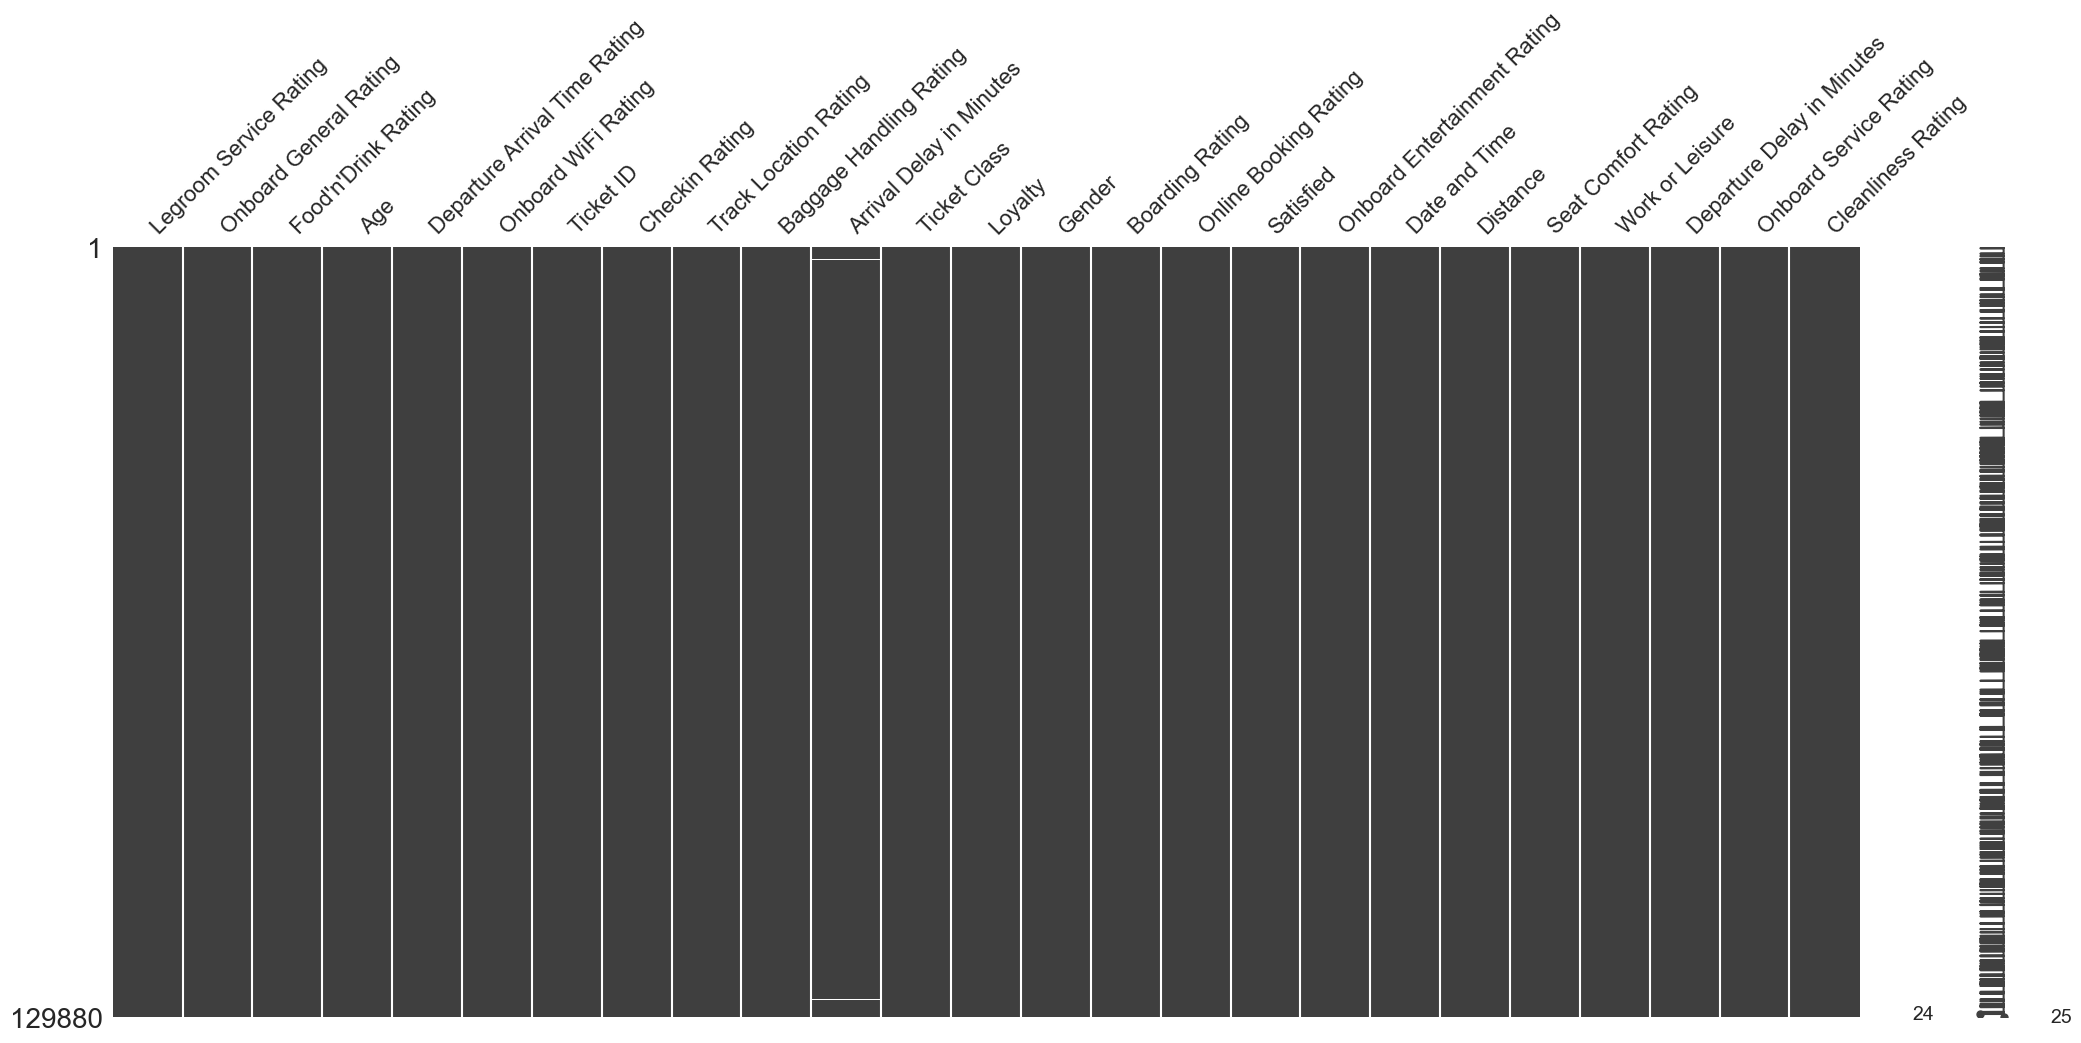

In [48]:
msno.matrix(trains_df)

<AxesSubplot:>

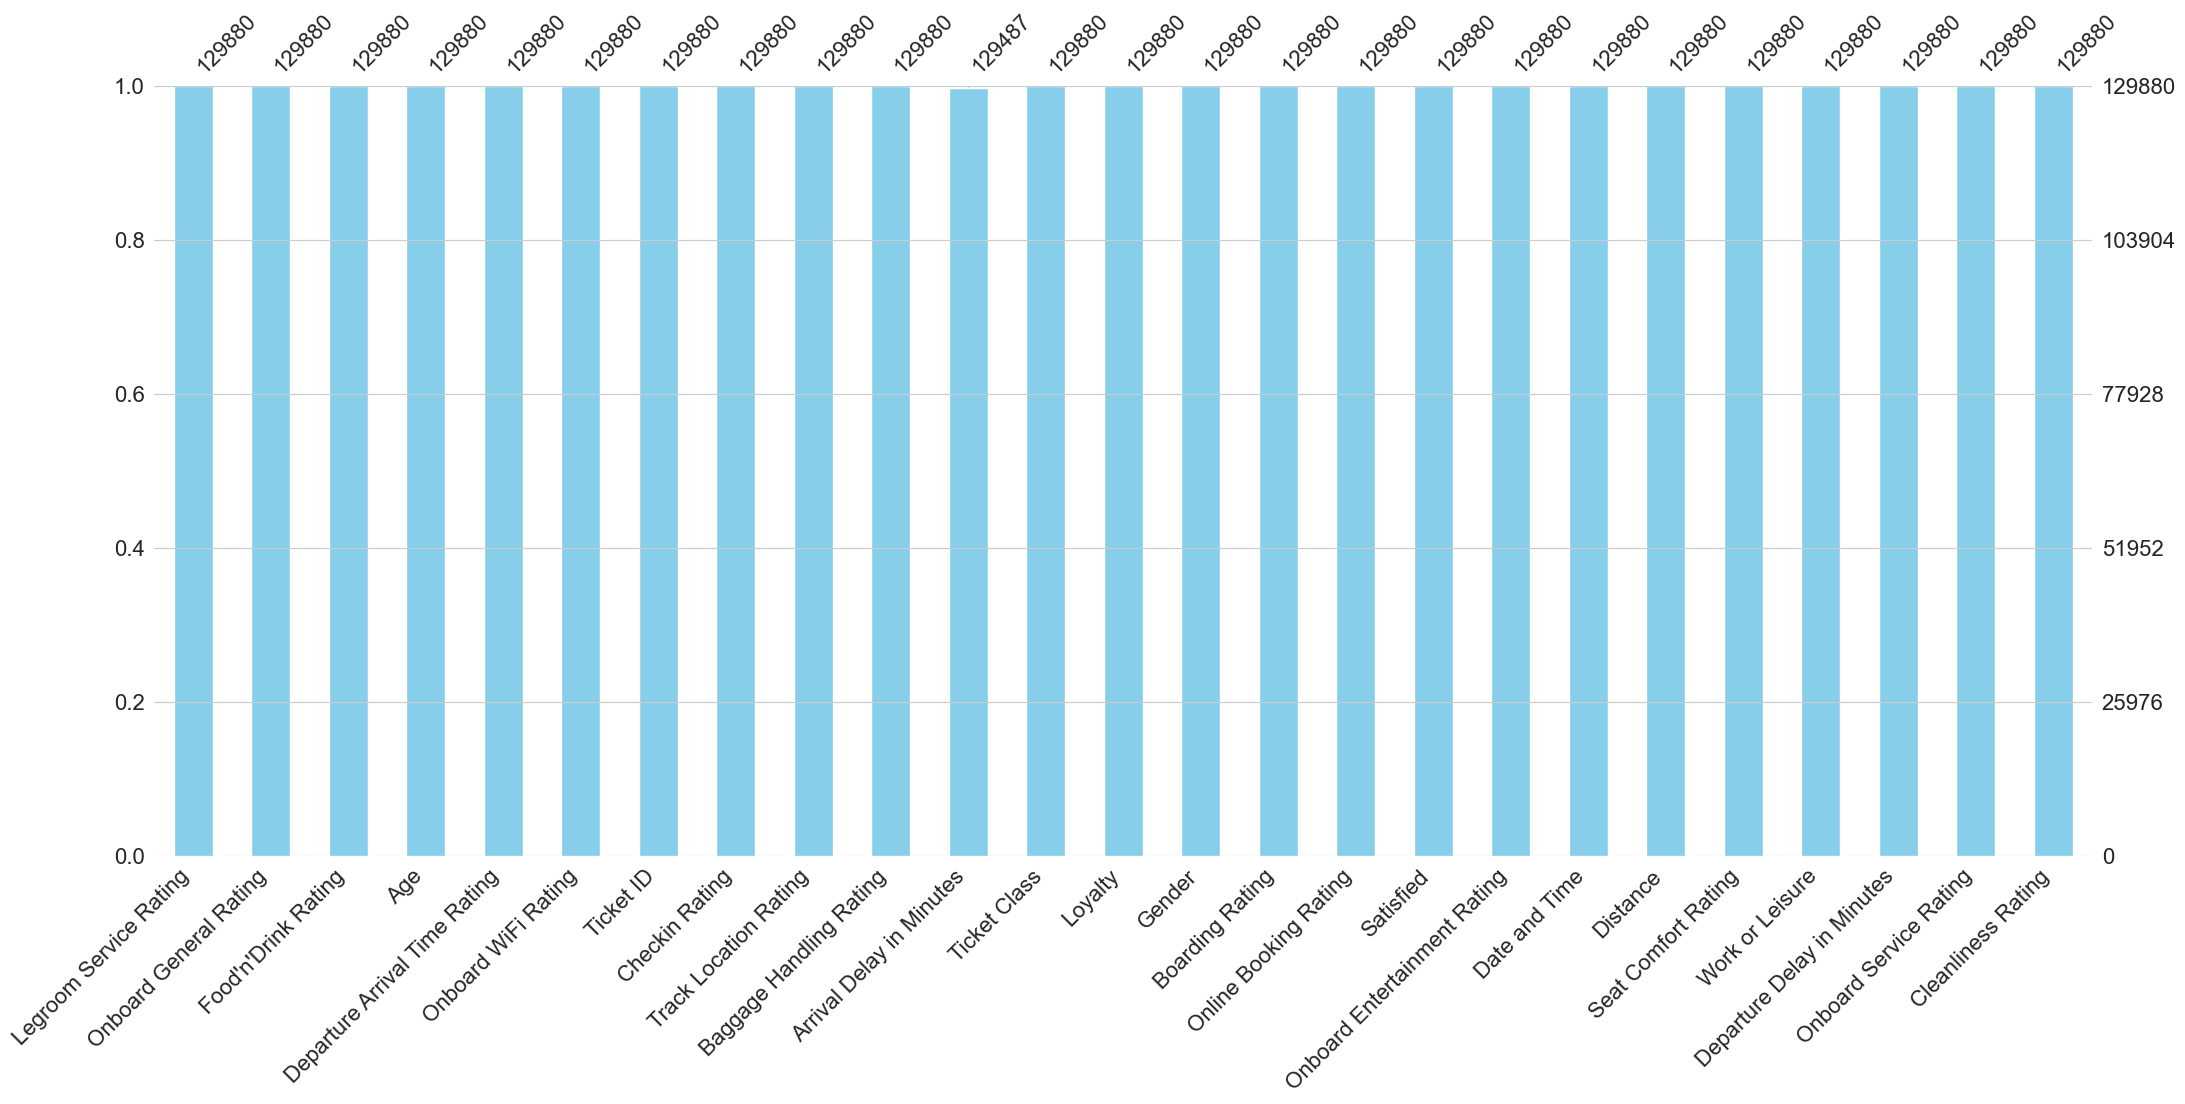

In [49]:
msno.bar(trains_df, color='skyblue', labels=True)

<AxesSubplot:>

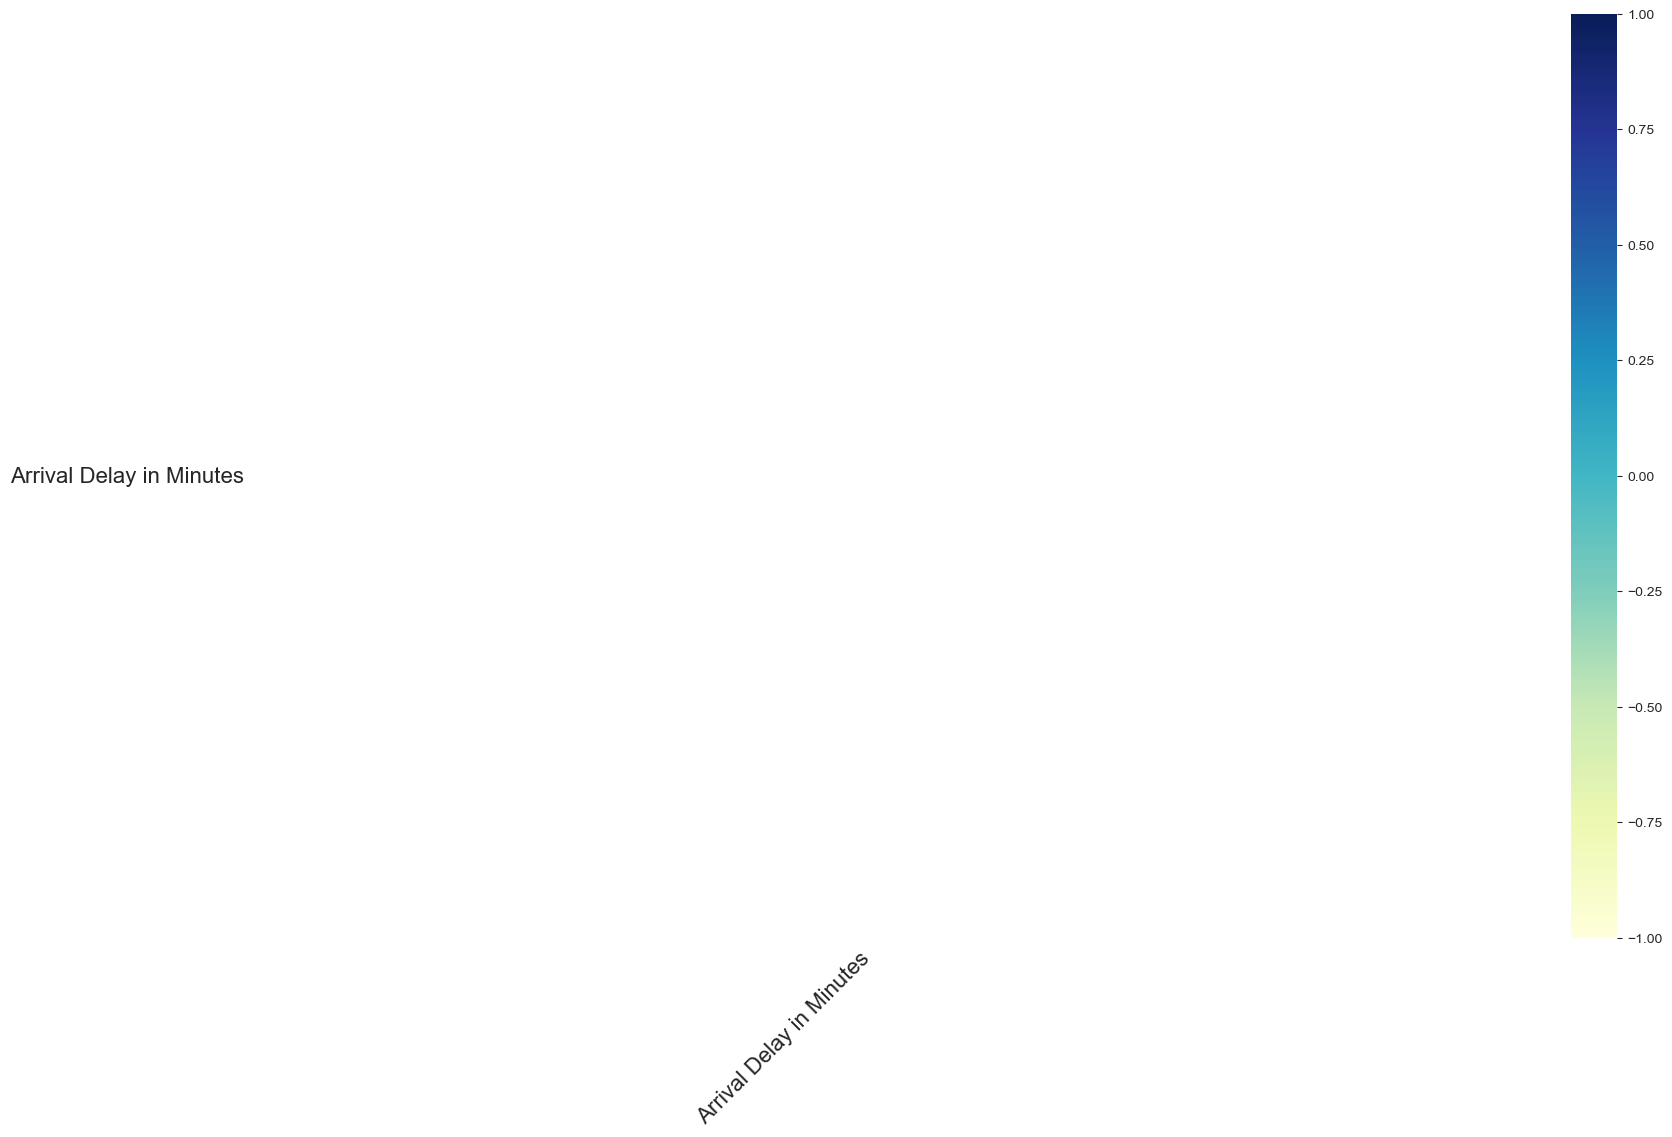

In [50]:
# create an msno heatmap showing the missing values
msno.heatmap(trains_df, cmap='YlGnBu', labels=True)

In [51]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(trains_df)

Your selected dataframe has 25 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,393,0.3


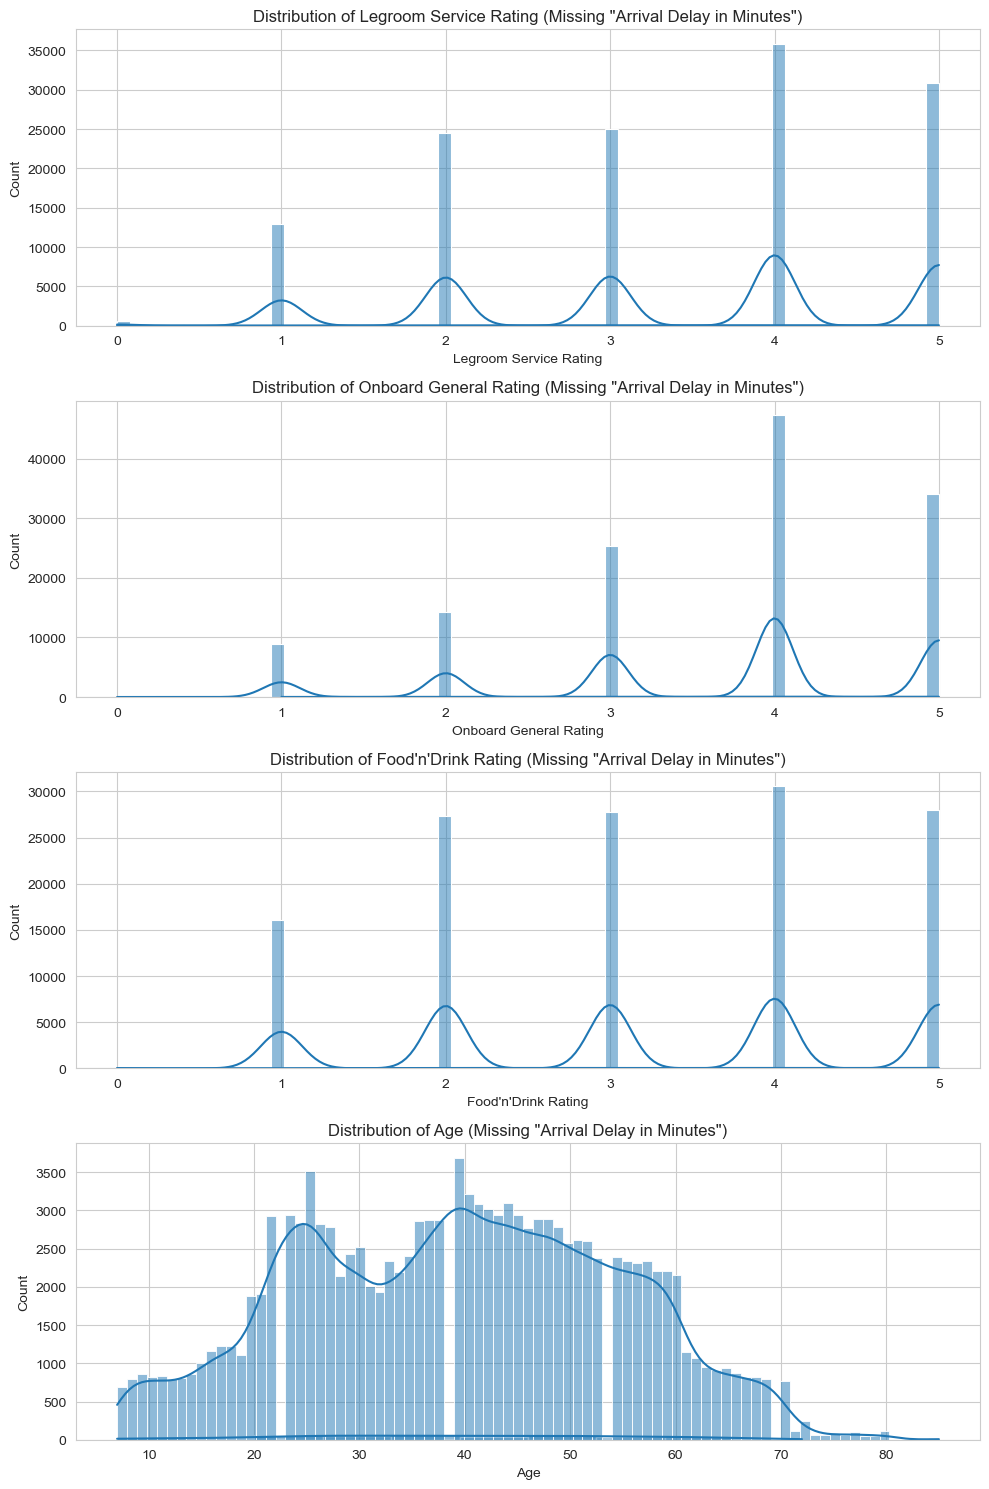

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'Arrival Delay in Minutes' is NaN
missing_delay_rows = trains_df[trains_df['Arrival Delay in Minutes'].isnull()]

# Select columns to create distribution plots
selected_columns = ['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age']

# Create a figure with subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_delay_rows, x=col, ax=axes[i], kde=True)
    sns.histplot(data=trains_df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} (Missing "Arrival Delay in Minutes")')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [53]:
# Approach 1a: Drop rows with missing 'deck' values
dropped_deck_rows = trains_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(trains_df) - len(dropped_deck_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 393


In [54]:
# Date and Time conversion: Convert 'Date and Time' to datetime
trains_df['Date and Time'] = pd.to_datetime(trains_df['Date and Time'])

# Extracting new features from 'Date and Time'
trains_df['Weekday'] = trains_df['Date and Time'].dt.day_name()
trains_df['Month'] = trains_df['Date and Time'].dt.month_name()
trains_df['Hour'] = trains_df['Date and Time'].dt.hour

# Summarize the distribution of categorical variables
categorical_summary = trains_df[['Satisfied', 'Work or Leisure', 'Ticket Class', 'Loyalty', 'Weekday', 'Month']].apply(pd.Series.value_counts)

# Analyzing the numerical data distribution with histograms
# Selecting numerical columns (excluding the 'Ticket ID' as it's a unique identifier)
numerical_columns = trains_df.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('Ticket ID')

# Correlation analysis
correlation_matrix = trains_df[numerical_columns].corr()

categorical_summary, correlation_matrix


(           Satisfied  Work or Leisure  Ticket Class   Loyalty  Weekday  \
 Disloyal         NaN              NaN           NaN   23780.0      NaN   
 Economy          NaN              NaN       58309.0       NaN      NaN   
 February         NaN              NaN           NaN       NaN      NaN   
 Friday           NaN              NaN           NaN       NaN  16301.0   
 Loyal            NaN              NaN           NaN  106100.0      NaN   
 March            NaN              NaN           NaN       NaN      NaN   
 Monday           NaN              NaN           NaN       NaN  24573.0   
 N            73452.0              NaN           NaN       NaN      NaN   
 Premium          NaN              NaN       62160.0       NaN      NaN   
 Saturday         NaN              NaN           NaN       NaN  16642.0   
 Smart            NaN              NaN        9411.0       NaN      NaN   
 Sunday           NaN              NaN           NaN       NaN  16593.0   
 Thursday         NaN    

[]

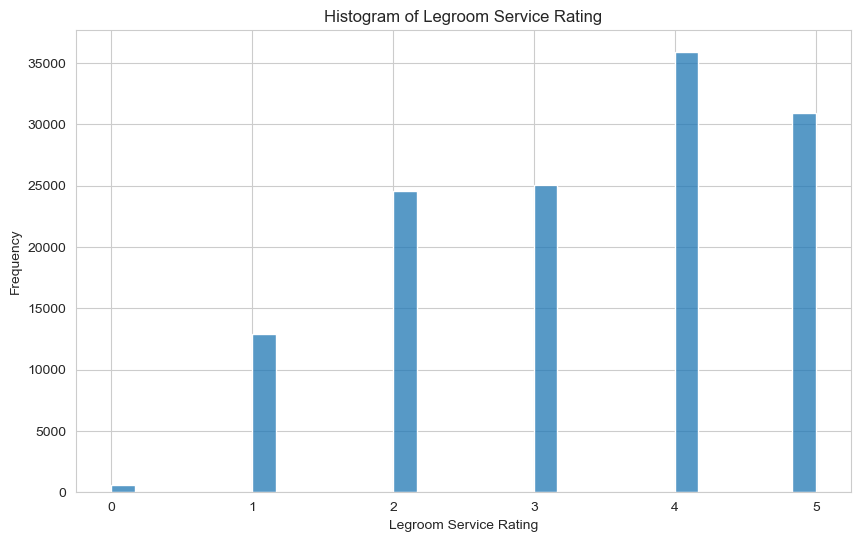

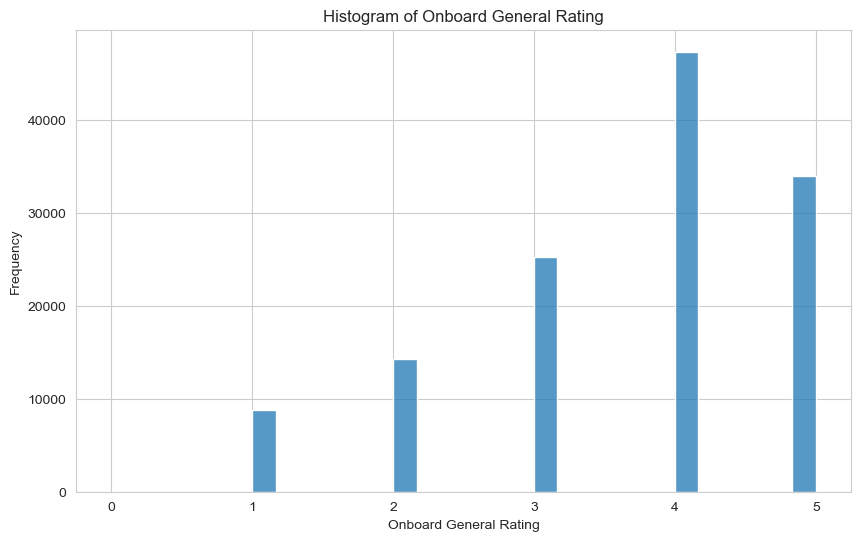

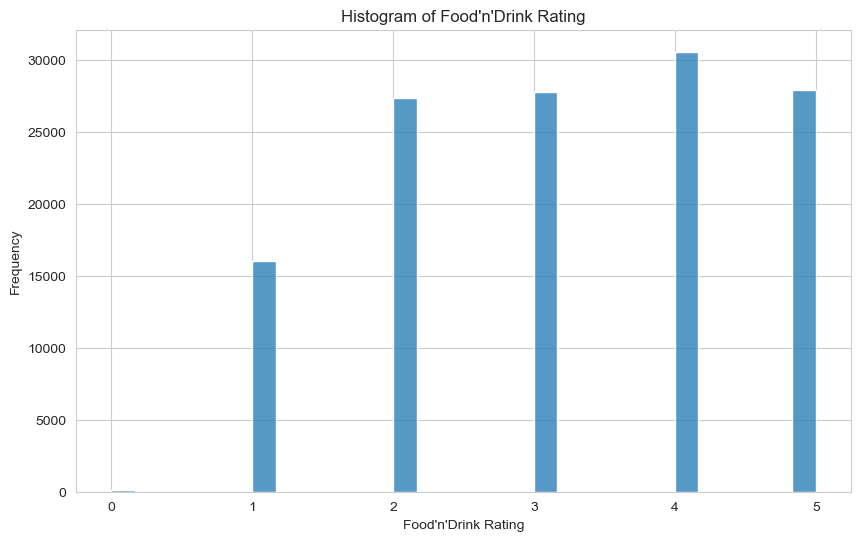

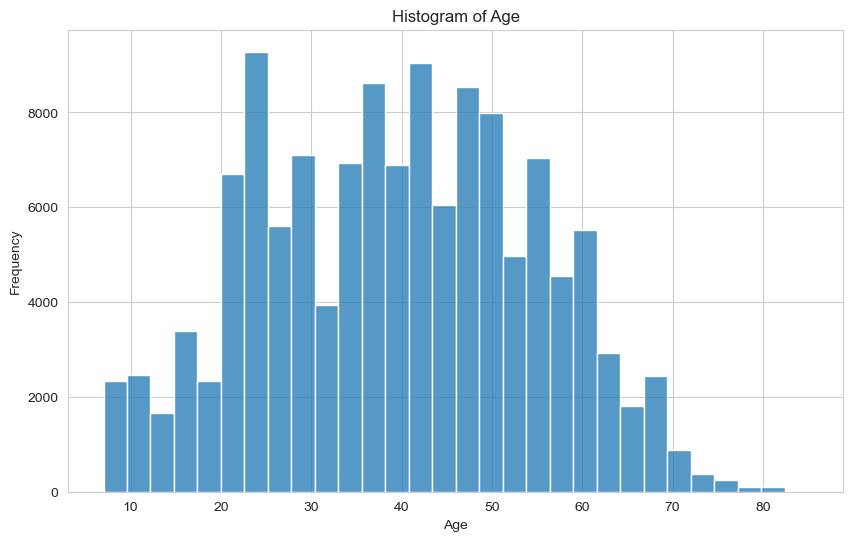

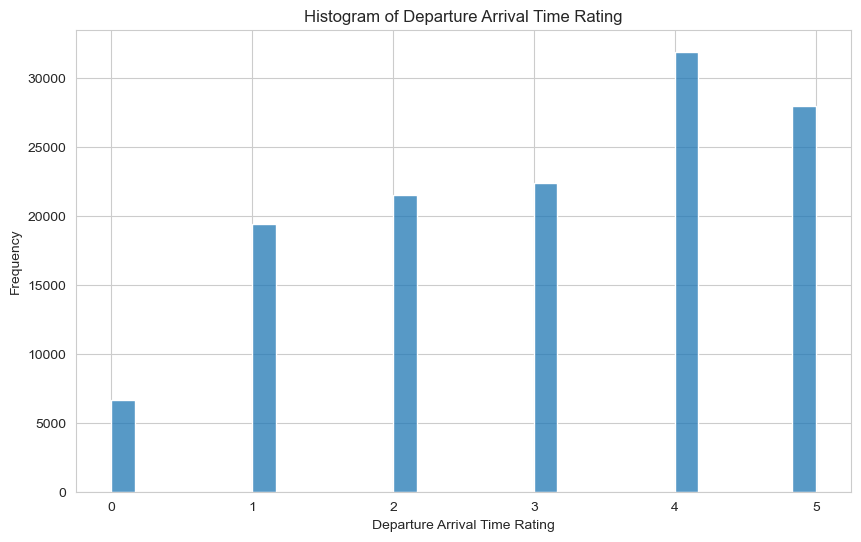

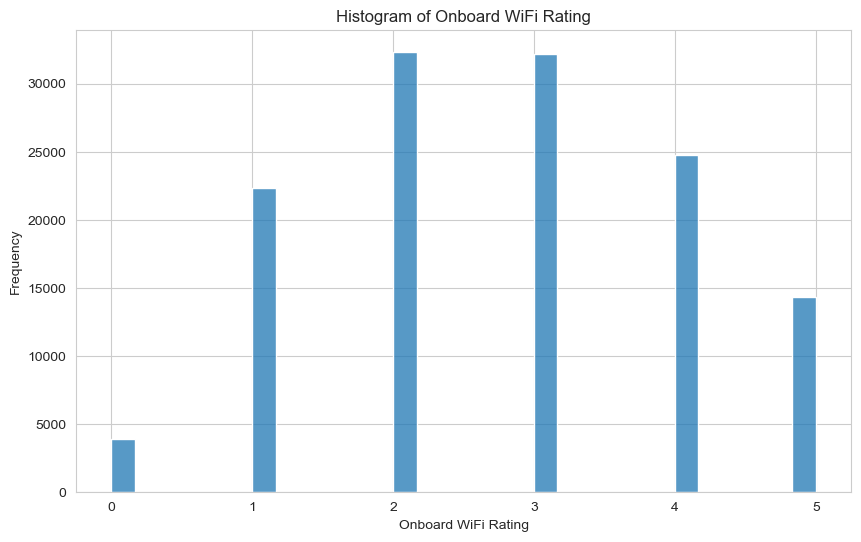

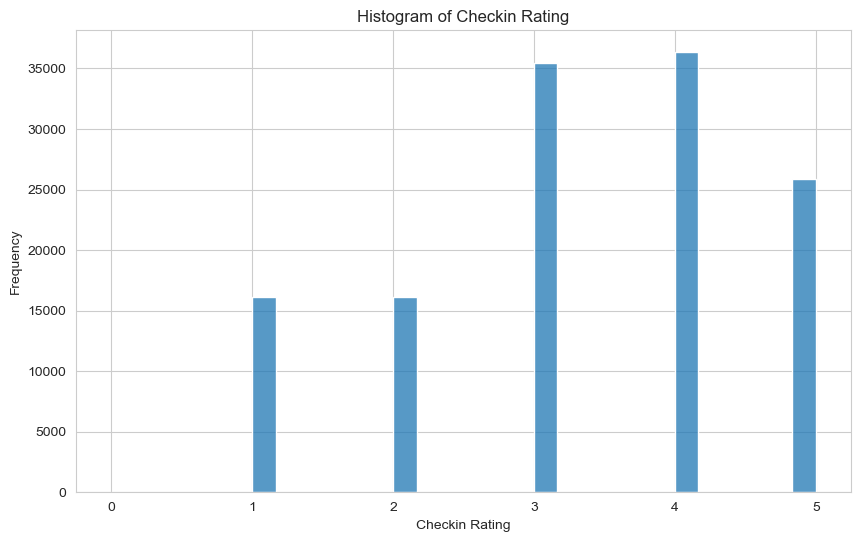

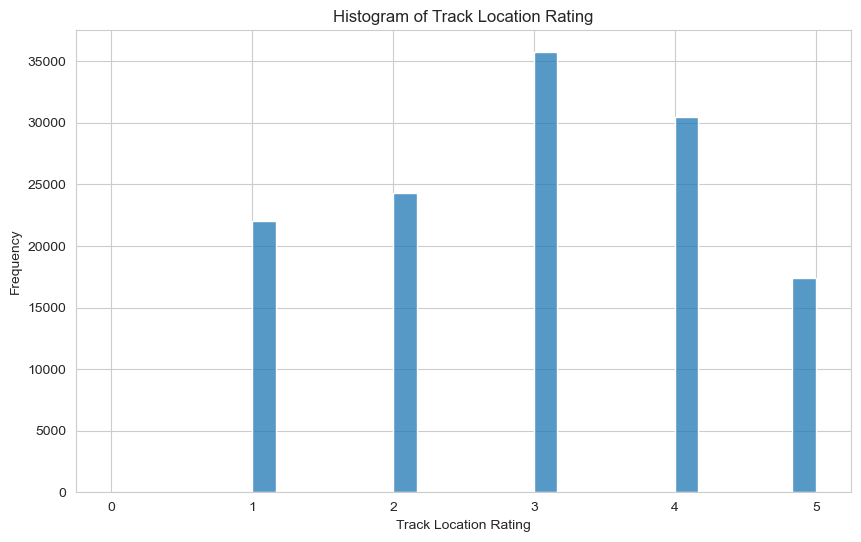

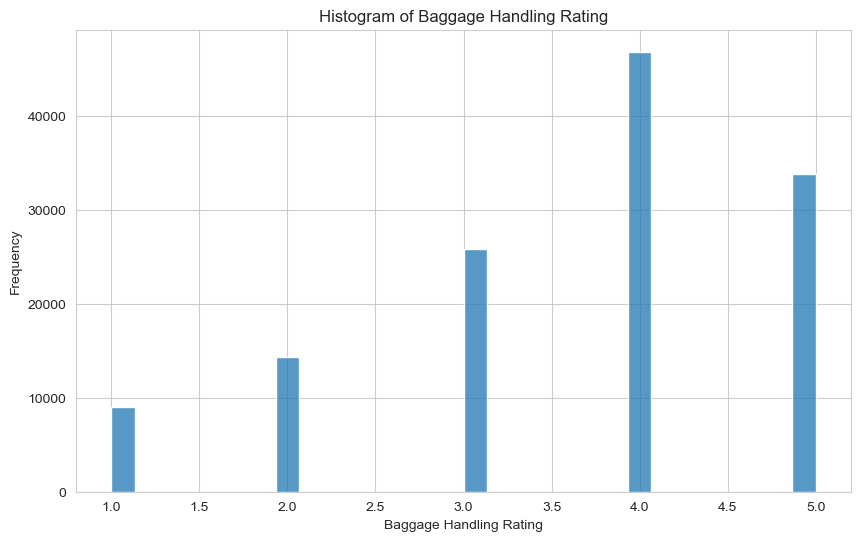

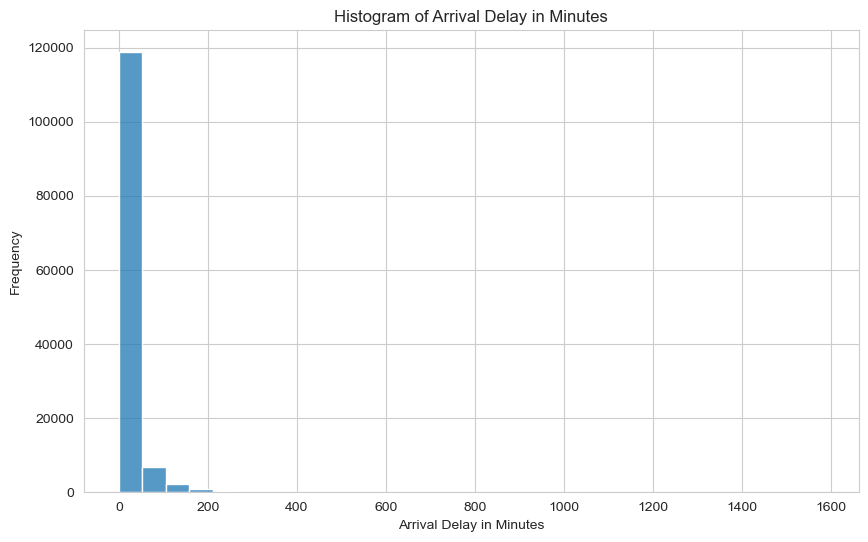

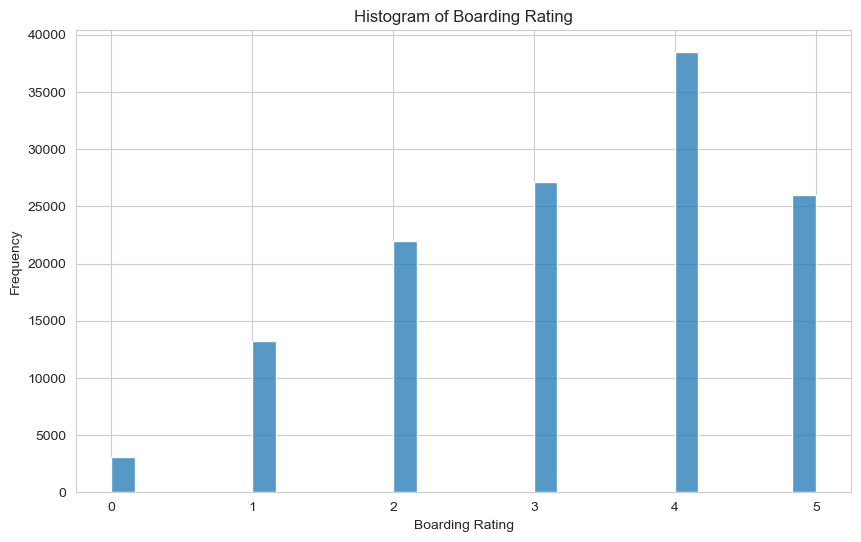

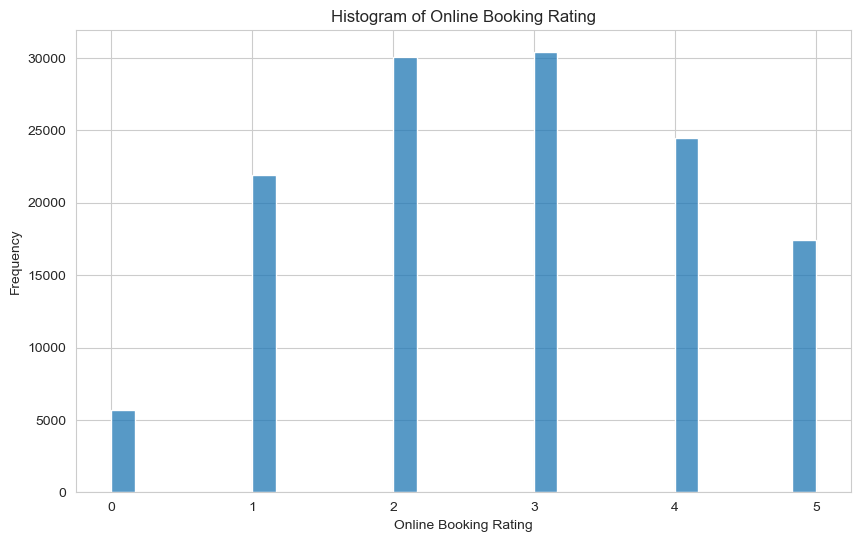

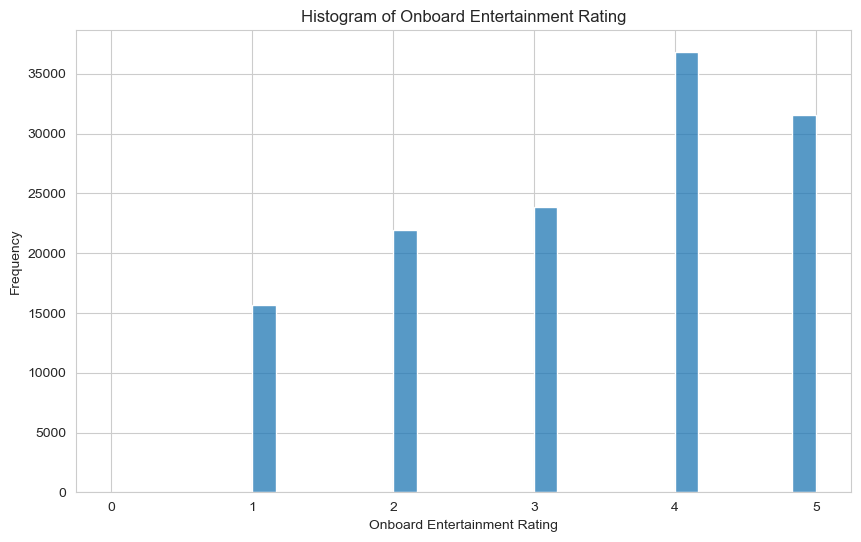

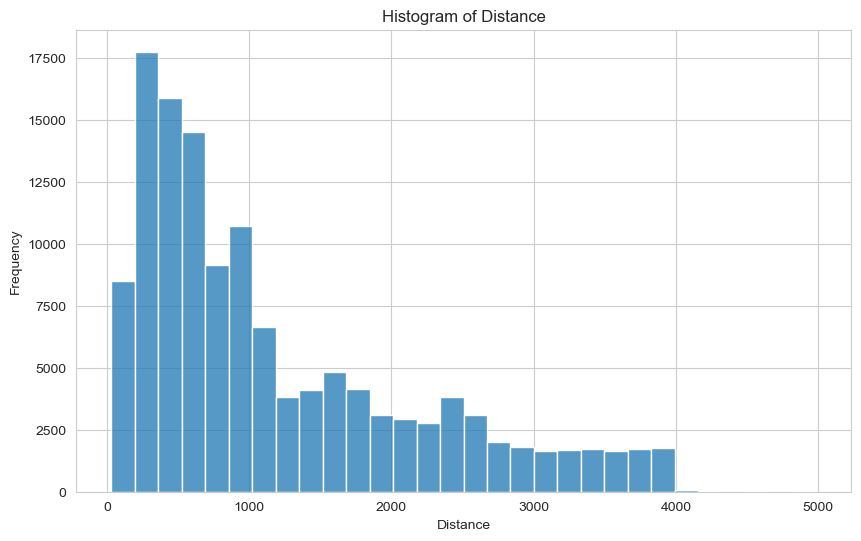

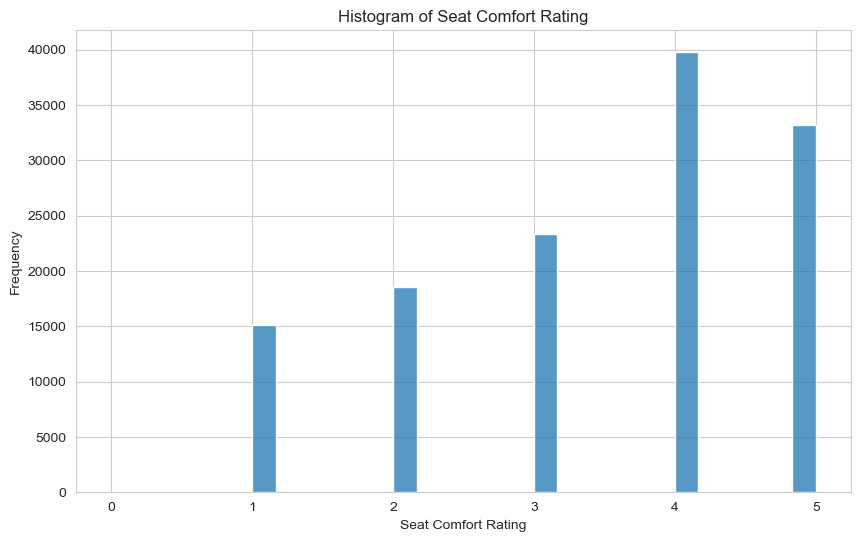

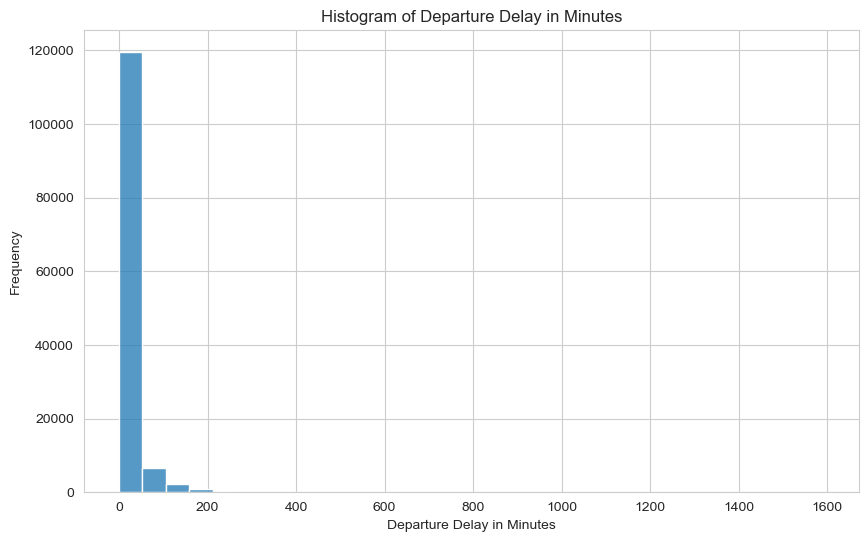

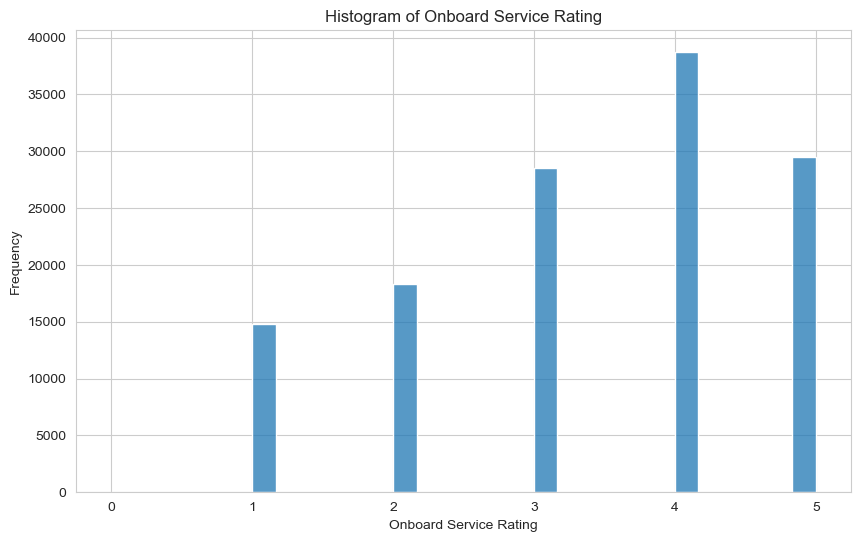

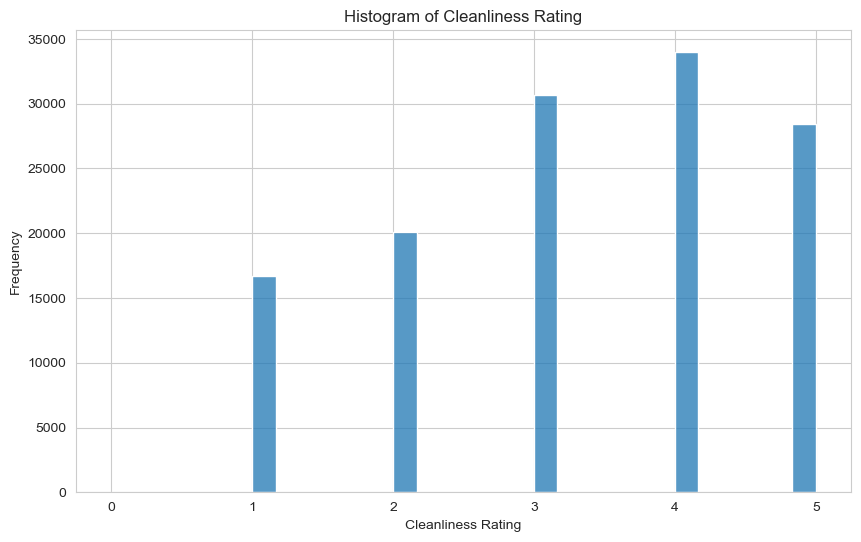

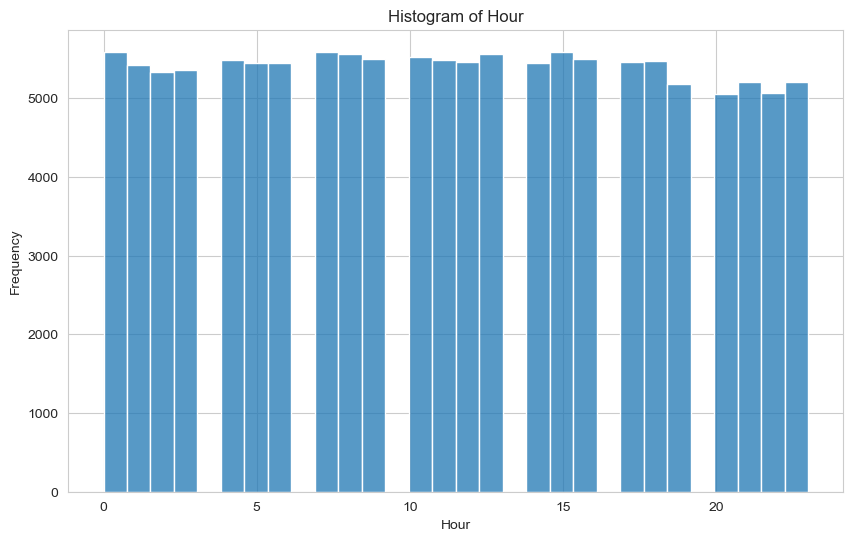

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Generate and save histograms for numerical variables
histogram_paths = []
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(trains_df[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
# Return the paths to the saved histogram images
histogram_paths


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

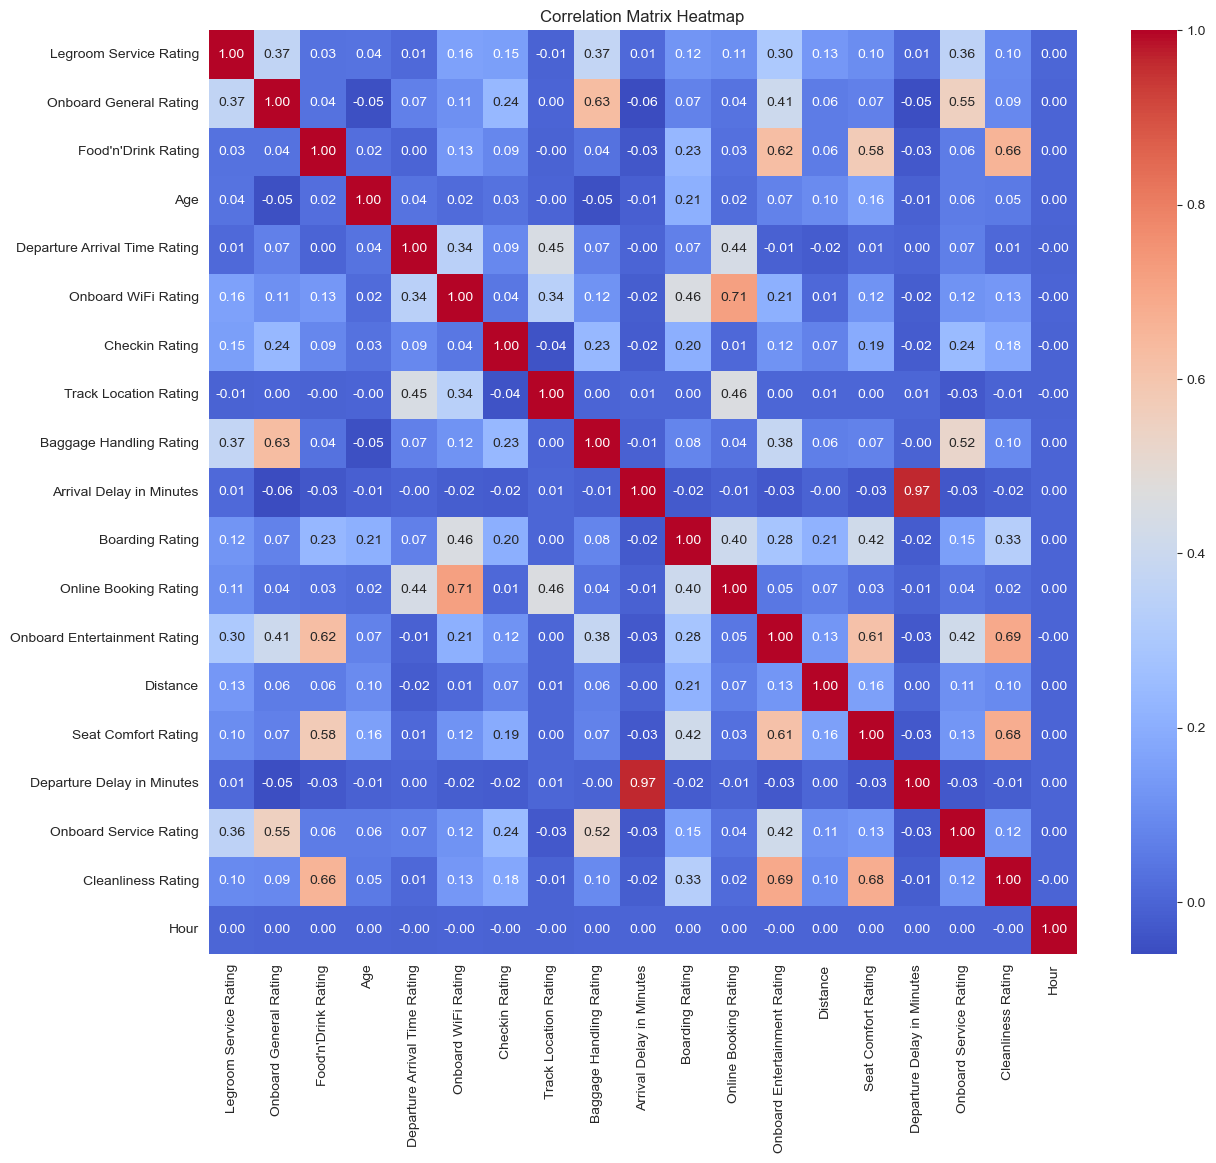

In [56]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")